Text(0.5, 1.0, 'Hidden Image')

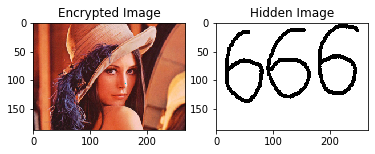

In [5]:
from PIL import Image
import PIL
import numpy as np
import matplotlib.pyplot as plt

lena = Image.open('lenna.jpg')
lena = np.array(lena) 

insert = Image.open('666.jpg')
insert = insert.resize((268,188))
insert = np.array(insert)

#insert = insert[:,:,0]
insert[insert<128] = 1
insert[insert>=128] = 0

# insert[insert==1] = 2
# insert[insert==0] = 1
# insert[insert==2] = 0

even = lena%2==0  # mask
lena[even] +=1
lena[lena>255] = 255
new_lena = lena + insert 

hidden = new_lena%2*255

plt.subplot(121)
plt.imshow(new_lena)
plt.title('Encrypted Image')
plt.subplot(122)
plt.imshow(hidden)
plt.title('Hidden Image')

In [4]:
info = 'abcefg scnu.'
en_info = info.encode()
print(en_info)
for i in en_info:
    print(i)
    


b'abcefg scnu.'
97
98
99
101
102
103
32
115
99
110
117
46


<img align="left" style="padding-right:10px;" src="ascii.png">

In [6]:
info = 'abc I love scnu.'
print(info[0])
print('******')
def encode(text):
    text = text.encode()
    code = ''
    for i in text:
        code += bin(i).replace('0b','').zfill(8) + ' '
    return code

def decode(code):
    nums = code.split()
    text = ''
    for n in nums:
        intn = int(n, 2)
        text += chr(intn)
    return text

print(info)
encode_info = encode(info)
print(encode_info.split())
decode_info = decode(encode_info)
print(decode_info) 

a
******
abc I love scnu.
['01100001', '01100010', '01100011', '00100000', '01001001', '00100000', '01101100', '01101111', '01110110', '01100101', '00100000', '01110011', '01100011', '01101110', '01110101', '00101110']
abc I love scnu.


Original Shape:
(188, 268, 3)
[115  37  25 119  39  28 118  35  27 119]
[115  37  25 119  39  28 118  35  27 119]


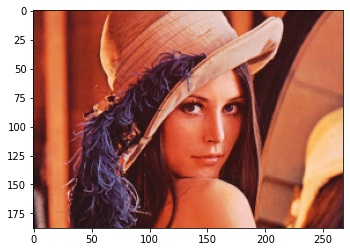

In [33]:
from PIL import Image
import PIL
import numpy as np
import matplotlib.pyplot as plt

def encode(text):
    code = []
    for i in text:
        code.append(bin(i).replace('0b','').zfill(8) + ' ')
    return code

def decode(code):
    #code = code.split()
    text = np.empty(len(code)).astype(np.uint8)
    for i, n in enumerate(code):
        intn = int(n, 2)
        text[i] = intn
    return text

lena = Image.open('lenna.jpg')
lena = np.array(lena) 
oshape = lena.shape
print('Original Shape:')
print(oshape)
lena_f = np.ravel(lena)

print(lena_f[0:10])
lena_encode = encode(lena_f)
lena_decode = decode(lena_encode)
print(lena_decode[0:10])
lena_recover = np.reshape(lena_decode, oshape)
plt.imshow(lena_recover)

Original Shape:
(940, 1340, 3)
Insert Shape:
(256, 256, 3)
419866
(196608,)
['01110011 ', '00100101 ', '00011001 ', '01110011 ', '00100101 ', '00011001 ', '01110011 ', '00100101 ', '00011001 ']
['11111111 ', '11111111 ', '11111111 ']


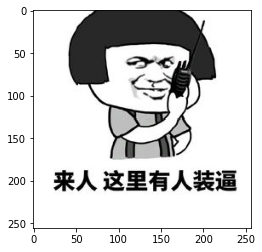

In [47]:
from PIL import Image
import PIL
import numpy as np
import matplotlib.pyplot as plt

def encode(text):
    code = []
    for i in text:
        code.append(bin(i).replace('0b','').zfill(8) + ' ')
    return code

def decode(code):
    #code = code.split()
    text = np.empty(len(code)).astype(np.uint8)
    for i, n in enumerate(code):
        intn = int(n, 2)
        text[i] = intn
    return text

lena = Image.open('lenna.jpg')
lena = lena.resize((268*5,188*5))
lena = np.array(lena) 
oshape = lena.shape
print('Original Shape:')
print(oshape)
lena_f = np.ravel(lena)

insert = Image.open('insert.jpg')
insert = insert.resize((256,256))
insert = np.array(insert) 
ishape = insert.shape
print('Insert Shape:')
print(ishape) 
plt.imshow(insert)
insert_f = np.ravel(insert) 

lena_code = encode(lena_f)
insert_code = encode(insert_f)#To Binary Codes
print(len(lena_code)//9)
print(np.shape(insert_code))
print(lena_code[0:9])
print(insert_code[0:3])

[ 28 119  39  28 119  39  28 119  39  28]
[ 29 119  39  29 119  39  28 119  39  29]


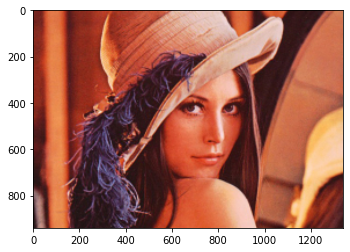

In [50]:
lena_code2 = lena_code.copy()
for i, insert_i in enumerate(insert_code):
    for j in range(9):
        if insert_i[j] != ' ':
            lena_code2[i*9+j] = lena_code2[i*9+j][:-2] + insert_i[j] + ' '
            
print(lena_f[20:30]) 
lena_decode = decode(lena_code2)
print(lena_decode[20:30])
lena_recover = np.reshape(lena_decode, oshape)
plt.imshow(lena_recover)

(196608,)


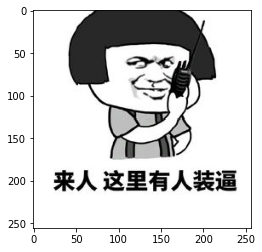

In [45]:
def get_info(img, info_shape):
    data = np.ravel(img)
    code = encode(data)
    recover = []
    for i in range(np.prod(info_shape)):
        btinfo = ''
        for j in range(9):
            if j%9 != 8:
                btinfo += code[i*9+j][-2]
            else:
                btinfo += ' ' 
        recover.append(btinfo)
    
    return recover

insert_recover = get_info(lena_recover, ishape)
insert_recover = decode(insert_recover)
print(insert_recover.shape)
insert_recover = np.reshape(insert_recover, ishape)
plt.imshow(insert_recover)